In [17]:
import yaml

with open('../intents.yml') as stream:
    intents = yaml.safe_load(stream)

# intents

Text(0, 0.5, 'Patterns')

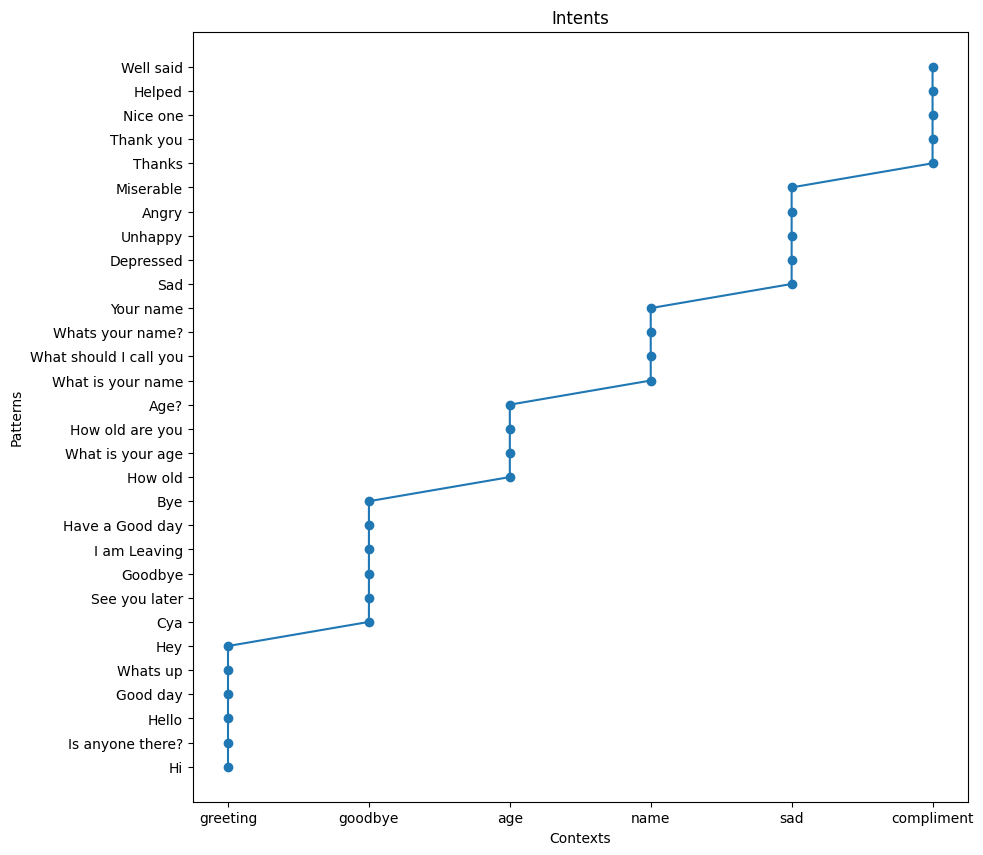

In [18]:
import matplotlib.pyplot as plt

patterns = []
contexts = []

for i in intents:
    for p in i['patterns']:
        patterns.append(p)
        contexts.append(i['context'])

plt.figure(figsize=(10, 10))
plt.plot(contexts, patterns, marker='o')
plt.title('Intents')
plt.xlabel('Contexts')
plt.ylabel('Patterns')

In [19]:
patterns

['Hi',
 'Is anyone there?',
 'Hello',
 'Good day',
 'Whats up',
 'Hey',
 'Cya',
 'See you later',
 'Goodbye',
 'I am Leaving',
 'Have a Good day',
 'Bye',
 'How old',
 'What is your age',
 'How old are you',
 'Age?',
 'What is your name',
 'What should I call you',
 'Whats your name?',
 'Your name',
 'Sad',
 'Depressed',
 'Unhappy',
 'Angry',
 'Miserable',
 'Thanks',
 'Thank you',
 'Nice one',
 'Helped',
 'Well said']

In [20]:
import nltk
import re
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

words = []
data = []
labels = []

for i in intents:
    for p in i['patterns']:
        p = re.sub(r'[^\w\s]', '', p.lower())

        tokenized_words = nltk.word_tokenize(p)
        stemmed_words = [stemmer.stem(w) for w in tokenized_words]

        words.extend(stemmed_words)

        data.append(stemmed_words)
        labels.append(i['context'])



In [21]:
words = sorted(set(words))
words

['a',
 'age',
 'am',
 'angri',
 'anyon',
 'are',
 'bye',
 'call',
 'cya',
 'day',
 'depress',
 'good',
 'goodby',
 'have',
 'hello',
 'help',
 'hey',
 'hi',
 'how',
 'i',
 'is',
 'later',
 'leav',
 'miser',
 'name',
 'nice',
 'old',
 'one',
 'sad',
 'said',
 'see',
 'should',
 'thank',
 'there',
 'unhappi',
 'up',
 'well',
 'what',
 'you',
 'your']

In [22]:
data

[['hi'],
 ['is', 'anyon', 'there'],
 ['hello'],
 ['good', 'day'],
 ['what', 'up'],
 ['hey'],
 ['cya'],
 ['see', 'you', 'later'],
 ['goodby'],
 ['i', 'am', 'leav'],
 ['have', 'a', 'good', 'day'],
 ['bye'],
 ['how', 'old'],
 ['what', 'is', 'your', 'age'],
 ['how', 'old', 'are', 'you'],
 ['age'],
 ['what', 'is', 'your', 'name'],
 ['what', 'should', 'i', 'call', 'you'],
 ['what', 'your', 'name'],
 ['your', 'name'],
 ['sad'],
 ['depress'],
 ['unhappi'],
 ['angri'],
 ['miser'],
 ['thank'],
 ['thank', 'you'],
 ['nice', 'one'],
 ['help'],
 ['well', 'said']]

In [23]:
labels

['greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'age',
 'age',
 'age',
 'age',
 'name',
 'name',
 'name',
 'name',
 'sad',
 'sad',
 'sad',
 'sad',
 'sad',
 'compliment',
 'compliment',
 'compliment',
 'compliment',
 'compliment']

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y

array([3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
x = []

for wrds in data:
    bag = []
    print(wrds)
    print(words)
    for w in words:
        if w in wrds:
            bag.append(1)
        else:
            bag.append(0)

    x.append(bag)
    print(bag)

len(x), len(x[0])


['hi']
['a', 'age', 'am', 'angri', 'anyon', 'are', 'bye', 'call', 'cya', 'day', 'depress', 'good', 'goodby', 'have', 'hello', 'help', 'hey', 'hi', 'how', 'i', 'is', 'later', 'leav', 'miser', 'name', 'nice', 'old', 'one', 'sad', 'said', 'see', 'should', 'thank', 'there', 'unhappi', 'up', 'well', 'what', 'you', 'your']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['is', 'anyon', 'there']
['a', 'age', 'am', 'angri', 'anyon', 'are', 'bye', 'call', 'cya', 'day', 'depress', 'good', 'goodby', 'have', 'hello', 'help', 'hey', 'hi', 'how', 'i', 'is', 'later', 'leav', 'miser', 'name', 'nice', 'old', 'one', 'sad', 'said', 'see', 'should', 'thank', 'there', 'unhappi', 'up', 'well', 'what', 'you', 'your']
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
['hello']
['a', 'age', 'am', 'angri', 'anyon', 'are', 'bye', 'call', 'cya', 'day', 'depress', 'good', 

(30, 40)

In [26]:
import numpy as np

x = np.array(x)
y = np.array(y)
x.shape

(30, 40)

In [27]:
import tensorflow as tf

with tf.device('/CPU:0'):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(len(x[0]))),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(len(set(y)), activation='softmax')
    ])

    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']
    )

    model.summary()
    
    history = model.fit(x, y, epochs=500, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                410       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 6)                 66        
                                                                 
Total params: 586
Trainable params: 586
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 - 0s - loss: 1.9101 - accuracy: 0.2000 - 190ms/epoch - 190ms/step
Epoch 2/500
1/1 - 0s - loss: 1.9019 - accuracy: 0.2000 - 1ms/epoch - 1ms/step
Epoch 3/500
1/1 - 0s - loss: 1.8937 - accuracy: 0.2333 - 1ms/epoch - 1ms/step
Epoch 4/500
1/1 - 0s - loss: 1.8856 - accuracy: 0.2333 - 1ms/epoch - 1ms/step
Epoc

In [28]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, to_file='images/model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


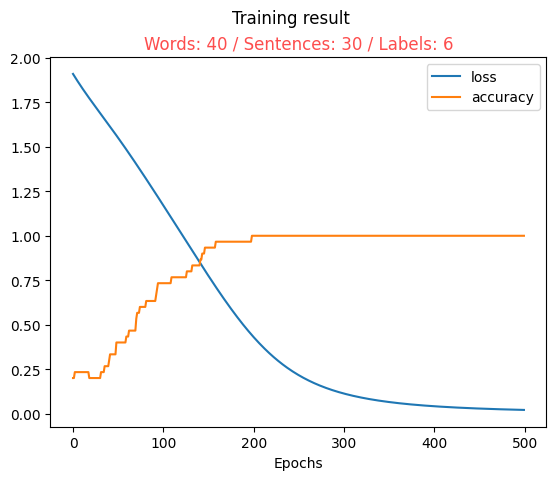

In [29]:
import pandas as pd

suptitle = 'Training result'
title = f'Words: {len(words)}'
title += ' / '
title += f'Sentences: {len(data)}'
title += ' / '
title += f'Labels: {len(set(y))}'

pd.DataFrame(history.history).plot()
plt.suptitle(suptitle)
plt.title(title, fontsize=12, color='#fd4d4d')
plt.xlabel('Epochs')
plt.savefig('../images/training_result.png')

In [30]:
def encode_words(input):

    """
        Accept input as string to normalize. Return a container of normalized input.
    """

    stemmer = SnowballStemmer('english')

    tokenized_input = nltk.word_tokenize(input.lower())
    stemmed_input = [stemmer.stem(i) for i in tokenized_input]

    container = []

    for w in words:
        if w in stemmed_input:
            container.append(1)
        else:
            container.append(0)

    # Change shape from (x, ) to (1, x)
    return np.expand_dims(container, axis=0)

In [31]:
query = encode_words('Hello')
query.shape, query

((1, 40),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [32]:
probabilities = model.predict(query)
prediction = np.argmax(probabilities)
prediction, probabilities

1/1 [==============================] - 0s 48ms/step


(3,
 array([[1.5951573e-03, 1.8635878e-02, 1.2197205e-03, 9.6911544e-01,
         1.1345135e-04, 9.3204239e-03]], dtype=float32))

In [33]:
context = label_encoder.inverse_transform([prediction])[0]
result = next(res for res in intents if res['context'] == context)

print(f'Prediction: {context}')
print(f'Probability: {np.amax(probabilities) * 100:.2f}%')

result

Prediction: greeting
Probability: 96.91%


{'context': 'greeting',
 'patterns': ['Hi',
  'Is anyone there?',
  'Hello',
  'Good day',
  'Whats up',
  'Hey'],
 'responses': ['Hello', 'Hi', 'Greetings', 'Nice to meet you']}